### [Feature Matching](https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html)
We know a great deal about feature detectors and descriptors. It is time to learn how to match different descriptors. OpenCV provides two techniques, Brute-Force matcher and FLANN based matcher.

#### Goal
In this chapter

* We will see how to match features in one image with others.
* We will use the Brute-Force matcher and FLANN Matcher in OpenCV

#### Basics of Brute-Force Matcher
Brute-Force 매처는 간단합니다. 첫 번째 세트에서 한 피쳐의 디스크립터를 취해 거리 계산을 사용하여 두 번째 세트의 다른 모든 피쳐와 일치시킵니다. 가장 가까운 것이 반환됩니다.

BF 매처의 경우 먼저 [cv.BFMatcher ()](https://docs.opencv.org/3.4/d3/da1/classcv_1_1BFMatcher.html)를 사용하여 [BFMatcher](https://docs.opencv.org/3.4/d3/da1/classcv_1_1BFMatcher.html) 객체를 만들어야합니다 . 두 개의 선택적 매개 변수가 필요합니다. 첫 번째는 normType입니다. 사용할 거리 측정을 지정합니다. 기본적으로 cv.NORM_L2 입니다. SIFT, SURF 등 ( cv.NORM_L1 도 있습니다)에 좋습니다. ORB, BRIEF, BRISK 등의 바이너리 스트링 기반 디스크립터의 경우 cv.NORM_HAMMING을 사용해야하며, 해밍 거리를 측정으로 사용한다. ORB가 WTA_K == 3 또는 4를 사용하면 cv.NORM_HAMMING2를 사용해야합니다.

두 번째 매개 변수는 부울 변수 인 crossCheck이며 기본적으로 false입니다. 참인 경우 Matcher는 집합 A의 i 번째 설명자가 집합 B의 j 번째 설명자를 가장 잘 일치하도록 (즉, 값이 (i, j) 인 일치 항목 만 반환하고 그 반대의 경우도 마찬가지입니다. 즉, 두 세트의 두 기능이 서로 일치해야합니다. 일관된 결과를 제공하며 D.Lowe가 SIFT 논문에서 제안한 비율 테스트의 좋은 대안입니다.

일단 그것이 생성되면, 중요한 두 가지 메소드는 BFMatcher.match () 와 BFMatcher.knnMatch () 입니다. 첫 번째는 가장 일치하는 것을 반환합니다. 두 번째 방법은 k가 사용자에 의해 지정된 k 개의 최상의 일치를 반환합니다. 추가 작업이 필요할 때 유용 할 수 있습니다.

cv.drawKeypoints () 를 사용 하여 키포인트를 그리는 것처럼 cv.drawMatches () 를 사용하여 일치 항목을 그릴 수 있습니다. 두 개의 이미지를 가로로 쌓고 첫 번째 이미지에서 두 번째 이미지까지 선을 그려 가장 잘 맞는 이미지를 보여줍니다. 모든 k 개의 가장 일치하는 것을 가져 오는 cv.drawMatchesKnn 도 있습니다 . k = 2이면 각 키포인트에 대해 두 개의 일치 행을 그립니다. 마스크를 선택적으로 그리려면 마스크를 전달해야합니다.

SURF와 ORB 각각에 대해 하나의 예제를 보도록하겠습니다. 둘 다 다른 거리 측정을 사용합니다.

##### Brute-Force Matching with ORB Descriptors
여기서는 두 이미지간에 피쳐를 일치시키는 방법에 대한 간단한 예를 살펴 보겠습니다. 이 경우 queryImage 및 trainImage가 있습니다. 특징 매칭을 사용하여 trainImage에서 queryImage를 찾으려고합니다. (이미지는 /samples/c/box.png 및 /samples/c/box_in_scene.png입니다.)

ORB 기술자를 사용하여 기능을 일치시킵니다. 이제 이미지로드, 설명 자 찾기 등으로 시작하겠습니다.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import bonghanUtil as u

img1 = cv.imread('box.png',0)          # queryImage
img2 = cv.imread('box_in_scene.png',0) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

다음으로 거리 측정 cv.NORM_HAMMING (ORB를 사용하고 있으므로)을 사용하여 BFMatcher 객체를 만들고 더 나은 결과를 위해 crossCheck가 켜집니다. 그런 다음 Matcher.match () 메서드를 사용하여 두 이미지에서 가장 일치하는 것을 얻습니다. 우리는 거리의 오름차순으로 정렬하여 최상의 결과 (낮은 거리 포함)가 앞당겨집니다. 그런 다음 첫 번째 10 개 경기 만 표시합니다 (가시성을 위해 필요한만큼 늘릴 수 있습니다).

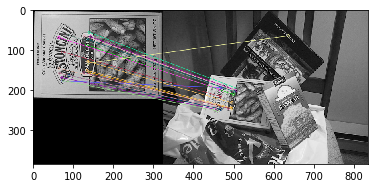

In [3]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

3# Draw first 10 matches.
outimg = np.ndarray(img1.shape)
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:20], None,  flags=2)
plt.imshow(img3),plt.show()
u.showImage(img3)

##### What is this Matcher Object?
What is this Matcher Object?
The result of matches = bf.match(des1,des2) line is a list of DMatch objects. This DMatch object has following attributes:

* DMatch.distance - Distance between descriptors. The lower, the better it is.
* DMatch.trainIdx - Index of the descriptor in train descriptors
* DMatch.queryIdx - Index of the descriptor in query descriptors
* DMatch.imgIdx - Index of the train image.

##### Brute-Force Matching with SIFT Descriptors and Ratio Test
This time, we will use BFMatcher.knnMatch() to get k best matches. In this example, we will take k=2 so that we can apply ratio test explained by D.Lowe in his paper.

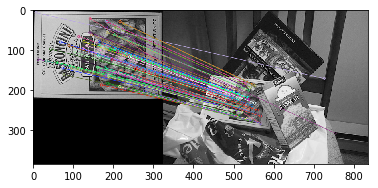

(<matplotlib.image.AxesImage at 0x2454c3ec6d8>, None)

In [19]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img1 = cv.imread('box.png',0)          # queryImage
img2 = cv.imread('box_in_scene.png',0) # trainImage

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k = 2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
outimg = np.ndarray(img1.shape)
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good, outimg, flags=2)
plt.imshow(img3),plt.show()

#### FLANN based Matcher
FLANN은 Approximate Nearest Neighbors의 Fast Library를 나타냅니다. 대규모 데이터 세트 및 고차원 기능에서 가장 가까운 가장 가까운 이웃 검색을 위해 최적화 된 알고리즘 모음이 포함되어 있습니다. 대규모 데이터 세트의 경우 BFMatcher보다 빠르게 작동합니다. FLANN 기반 matcher를 사용하여 두 번째 예제를 살펴 보겠습니다.

FLANN 기반 매처의 경우 사용 알고리즘, 관련 매개 변수 등을 지정하는 두 개의 사전을 전달해야합니다. 첫 번째는 IndexParams입니다. 다양한 알고리즘에 대해 전달할 정보는 FLANN 문서에 설명되어 있습니다. 요약하면 SIFT, SURF 등과 같은 알고리즘의 경우 다음을 전달할 수 있습니다.

In [ ]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

ORB를 사용하는 동안 다음을 전달할 수 있습니다. 주석 값은 문서별로 권장되지만 경우에 따라 필요한 결과를 제공하지 않습니다. 다른 값은 잘 작동했습니다.

In [ ]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

두 번째 사전은 SearchParams입니다. 인덱스의 트리를 재귀 적으로 탐색해야하는 횟수를 지정합니다. 값이 높을수록 정확도가 높아지지만 시간이 더 많이 걸립니다. 값을 변경하려면 search_params = dict (checks = 100)를 전달하십시오.

이 정보를 통해 우리는 잘 할 수 있습니다.

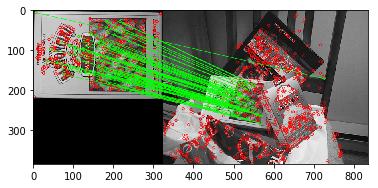

(<matplotlib.image.AxesImage at 0x2454cd7b5f8>, None)

In [20]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import bonghanUtil as u

img1 = cv.imread('box.png',0)          # queryImage
img2 = cv.imread('box_in_scene.png',0) # trainImage

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params  = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann         = cv.FlannBasedMatcher(index_params,search_params)
matches      = flann.knnMatch(des1, des2, k = 2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i]=[1, 0]
draw_params = dict(matchColor = (0, 255, 0),
                   singlePointColor = (255, 0, 0),
                   matchesMask = matchesMask,
                   flags = 0)
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
plt.imshow(img3,),plt.show()

#### Additional Resources
#### Exercises